## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [359]:
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

1. 23 variables and 2727 observations
2. 4 different types of incidents, 3 if excluding Nan
3. The largest fire in the raw data set burned 1032648.0 acres. The largest fire in the histogram below burned 429603.0 acres. 20 fires burned more than 100,000 acres

In [362]:
# You will need to write some code to answer the questions.
DF_raw.shape

(2727, 23)

In [363]:
# 1. 23 variables, 2727 observations

In [364]:
DF_raw.keys()

Index(['incident_name', 'incident_is_final', 'incident_date_last_update',
       'incident_date_created', 'incident_administrative_unit',
       'incident_administrative_unit_url', 'incident_county',
       'incident_location', 'incident_acres_burned', 'incident_containment',
       'incident_control', 'incident_cooperating_agencies',
       'incident_longitude', 'incident_latitude', 'incident_type',
       'incident_id', 'incident_url', 'incident_date_extinguished',
       'incident_dateonly_extinguished', 'incident_dateonly_created',
       'is_active', 'calfire_incident', 'notification_desired'],
      dtype='object')

In [365]:
my_columns=['incident_type']
DF_incidenttypes = DF_raw[my_columns]
incident_type_list = list(DF_incidenttypes['incident_type'].unique())
incident_type_list

# 4 different types of incidents, 3 if excluding NaN

[nan, 'Wildfire', 'Flood', 'Fire']

In [366]:
my_columns = ['incident_acres_burned','calfire_incident']
DF_acresburned = DF_raw[my_columns]
DF_acresburned['incident_acres_burned'].describe()

count    2.675000e+03
mean     4.399830e+03
std      3.585484e+04
min      0.000000e+00
25%      3.200000e+01
50%      8.600000e+01
75%      3.530000e+02
max      1.032648e+06
Name: incident_acres_burned, dtype: float64

In [367]:
my_columns = ['incident_acres_burned','calfire_incident']
DF_acresburned = DF_raw[my_columns]
DF_acresburned.groupby(by=['calfire_incident'])[my_columns].describe()



incident_acres_burned                                         \
                                 count         mean           std  min    25%   
calfire_incident                                                                
False                            770.0  8237.038961  56393.223332  0.0  44.25   
True                            1905.0  2848.832546  22642.207117  0.0  29.00   

                                             
                    50%      75%        max  
calfire_incident                             
False             156.0  1078.75  1032648.0  
True               73.0   237.00   429603.0

In [368]:
DF_acresburned.max()
mask_fires = (DF_acresburned['incident_acres_burned']>1000.0) & (DF_acresburned['incident_acres_burned']<500000.0)
DF_acresburned_mask = DF_acresburned[mask_fires]
DF_acresburned_mask


,incident_acres_burned,calfire_incident
5,6896.0,True
8,2956.0,True
13,4346.0,True
22,2650.0,True
25,2500.0,True
...,...,...
2682,17000.0,True
2688,44309.0,True
2698,54878.0,False
2699,1960.0,False


In [369]:
DF_acresburned_mask.max()

incident_acres_burned    429603.0
calfire_incident             True
dtype: object

In [370]:
mask_fires_2 = (DF_acresburned['incident_acres_burned']>100000.0)
DF_acresburned_mask2 = DF_acresburned[mask_fires_2]
fires_list = list(DF_acresburned_mask2['incident_acres_burned'].unique())
print(len(fires_list))


20


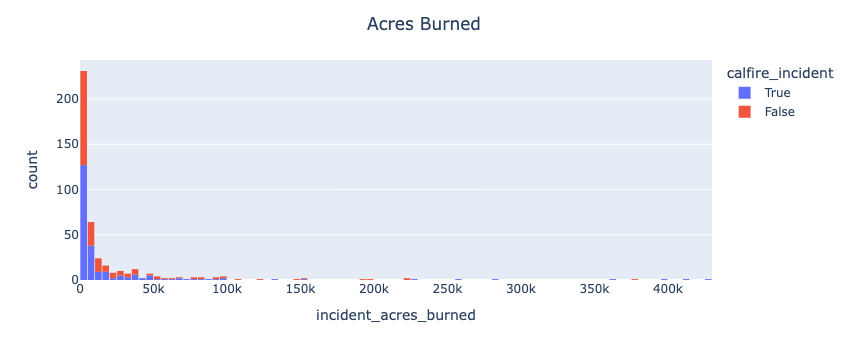

In [371]:
fig = px.histogram(DF_acresburned_mask,
                   nbins=100,
                   x='incident_acres_burned',
                   color = 'calfire_incident')


fig.update_layout(bargap=0.1,
                  title='Acres Burned',
                  title_x=0.5)
fig.show()

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [373]:
# Your code here
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF[0]

,Film,Year,Awards,Nominations
0,Oppenheimer,2023,7,13
1,Poor Things,2023,4,11
2,The Zone of Interest,2023,2,5
3,American Fiction,2023,1,5
4,Anatomy of a Fall,2023,1,5
...,...,...,...,...
1368,The Yankee Doodle Mouse,1943,1,1
1369,The Yearling,1946,2,7
1370,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1371,You Can't Take It with You,1938,2,7


In [374]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [376]:
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,979
1,2,156
2,3,77
3,4,47
4,0 (1),32
5,5,25
6,7,12
7,6,12
8,1 (1),8
9,8,7


In [377]:
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,987
1,2,157
2,3,78
3,4,48
4,0,36
5,5,26
6,7,13
7,6,13
8,8,8
9,11,3


In [378]:
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations    object
dtype: object

**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [380]:
DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
nominations_data = DF_raw['Nominations'].value_counts()
DF_nominations = nominations_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_nominations

,Nominations,count
0,1,553
1,2,141
2,4,115
3,5,104
4,3,104
5,6,80
6,7,75
7,8,61
8,10,40
9,9,31


In [381]:
nominations_data = DF_raw['Nominations'].value_counts()
DF_nominations = nominations_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_nominations

,Nominations,count
0,1,553
1,2,141
2,4,115
3,5,104
4,3,104
5,6,80
6,7,75
7,8,61
8,10,40
9,9,31


In [382]:
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations     int64
dtype: object

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

1647 observations, 107 variables
There are a lot of variables so I narrowed the dataframe down into columns I care about.
When I do dtypes on the more specific dataframe, the types of data are what I expected. All the categorical data are objects and the numerical latitude/longitude data are floats.
.describe worked like I expected. It took the statistics of the numerical data only (latitude/longitude)
The data does not need to be fixed. The types of data are correct. There are some variables where there is data missing like shipwrecks and tidepools, so maybe we would have to add NaN or No to these variables.

In [385]:
DF_beaches = pd.read_csv('Public_Access_Points.csv')
show(DF_beaches)

In [386]:
DF_beaches.shape

(1647, 107)

In [387]:
for i in DF_beaches.keys():
    print(i)

X
Y
FID
Index_
DISTRICT
CountyNum
COUNTY
Name
Location
InMobileWe
PHONE_NMBR
FeatureTyp
AccessType
O_PUBLIC
FEE
PARKING
PUBTRANSP
RSTRCTNS
DSABLDACSS
RESTROOMS
VISTOR_CTR
DOG_FRIEND
EZ4STROLLE
LIFEGUARD
SHOWERS
FOOD
DRINKWTR
PCNC_AREA
FIREPITS
CAMPGROUND
NUM_REG_CP
NUM_PRM_CP
NUM_GRP_CP
RV_CMP
NUM_RV_STE
HOSTEL
NUM_HSL_BD
NUM_HTL_RM
BT_FACILIT
BT_FACIL_T
MRA_NM_SLP
MRA_NUM_MR
LIGHTHOUSE
LTHS_Y_CON
LTHS_HT
PIER
PIER_Y_CON
PIER_LNGTH
HSTRC_STR
SHPWRECKS
SNDY_BEACH
DUNES
RKY_SHORE
UPLAND_BCH
STRM_CRDOR
WETLAND
BLUFF
BAY_LGN_LK
URBN_WFRNT
OFFSHR_RFG
INLND_AREA
STRS_BEACH
PTH_BEACH
BOARDWLK
BLFTP_TRLS
BLFTP_PRK
TRAIL_OR_P
CCT_LINK
CCTdesigna
BIKE_PATH
EQUEST_TRL
WLDLFE_VWG
SWM_POOL
SWIMMING
DIVING
SNORKLNG
TIDEPOOL
PLAYGROUND
SPORT_FLDS
VOLLEYBALL
WNDSRF_KIT
KAYAKING
SURFING
FISHING
BOATING
BOAT_TOURS
MBCH_SHORE
MBCH_OPEN
A_LND_AC
A_LND_OPEN
SQ_MILES
MILES_TRLS
PermitNum
DATE_OPN
Date_Closd
Archived
ClosureCom
SWAG_CRnmb
O_CLT_AREA
LATITUDE
LONGITUDE
Photo_1
Photo_2
Photo_3
Photo_4
Bch_whlc

In [440]:
my_columns = ['COUNTY','AccessType','Name', 'Location','SNDY_BEACH','SHPWRECKS','RKY_SHORE','TIDEPOOL','LATITUDE','LONGITUDE']
DF_beachesfinal = DF_beaches[my_columns]
show(DF_beachesfinal)



In [415]:
DF_beachesfinal.dtypes

COUNTY         object
Name           object
Location       object
SNDY_BEACH     object
SHPWRECKS      object
RKY_SHORE      object
TIDEPOOL       object
LATITUDE      float64
LONGITUDE     float64
dtype: object

In [418]:
DF_beachesfinal.describe()

,LATITUDE,LONGITUDE
count,1647.000000,1647.000000
mean,36.030660,-120.673615
std,2.601830,2.399567
min,32.544516,-124.390964
25%,33.751148,-122.673277
50%,35.406135,-120.887354
75%,37.902840,-118.337843
max,41.992854,-117.062808


In [449]:
mask_beaches = (DF_beachesfinal['AccessType']=='Boat Access')
DF_beachesfinal_masked = DF_beachesfinal[mask_beaches]
DF_beachesfinal_masked

,COUNTY,AccessType,Name,Location,SNDY_BEACH,SHPWRECKS,RKY_SHORE,TIDEPOOL,LATITUDE,LONGITUDE
3,Del Norte,Boat Access,Smith River Boating Access,"Fred Haight Dr., W. of Hwy. 101, 3 mi. S. of T...",No,,No,,41.890326,-124.147810
4,Del Norte,Boat Access,Xaa-wan'-k'wvt Village & Resort Boat Ramp,"200 N Salmon Harbor Rd, Smith River.",Yes,,Yes,,41.943917,-124.198709
7,Del Norte,Boat Access,Lakeview Drive Boat Launch,End of Lakeview Dr. off Lake Earl Dr.,No,,No,No,41.813705,-124.180635
12,Del Norte,Boat Access,Jedediah Smith Redwoods State Park,"Hwy. 199, 5 mi. E. of Hwy. 101",No,,No,,41.795574,-124.085074
13,Del Norte,Boat Access,Smith River National Recreation Area,"Hwy. 199, 14 mi. E of Hwy. 101",No,,No,,41.846261,-123.969349
...,...,...,...,...,...,...,...,...,...,...
1586,San Diego,Boat Access,America's Cup Harbor,"E. of Rosecrans St., N. of Shelter Island Dr.,...",No,,,,32.720976,-117.224770
1612,San Diego,Boat Access,Glorietta Bay Marina,"1715 Strand Way, Coronado",No,,,,32.678945,-117.174461
1617,San Diego,Boat Access,Chula Vista Bayside Park,"End of Marina Parkway, Chula Vista",Yes,,,,32.628267,-117.107364
1618,San Diego,Boat Access,Chula Vista Launch Ramp,"W. end of Marina Way, off Marina Parkway, Chul...",No,,,,32.621377,-117.103395


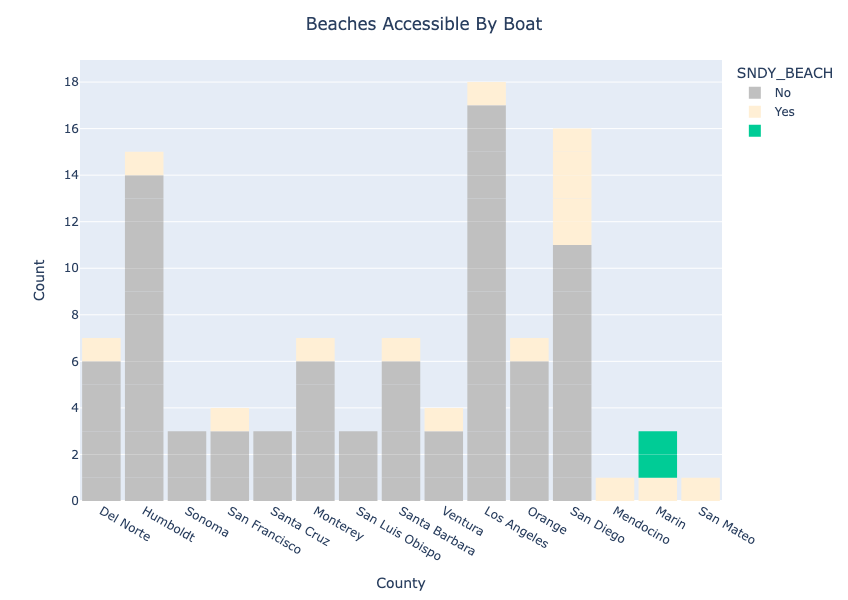

In [470]:
fig = px.bar(DF_beachesfinal_masked,
            x='COUNTY',
            color='SNDY_BEACH',
            color_discrete_map={'Yes': 'papayawhip', 
                                       'No':'silver'})
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(bargap=0.1,
                  title='Beaches Accessible By Boat',
                  title_x=0.5,
                  xaxis_title="County",
                  yaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()